# Exercise 2: Benefit of BatchNorm with CIFAR10 Classification

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import layers

### a) Implement a mixed CNN/ML architecture (at least 3 conv and at least 2 fully connected hidden layers, ReLU) for classifying CIFAR10 images - without any batchnorm layers nor regularisation. To give an example, this may look as follows : (Conv2d, ReLU, MaxPool), (Conv2d, ReLU, MaxPool), (Linear, ReLU), (Linear,ReLU), Linear [+possibly Softmax].

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


C:\Users\micha\AppData\Local\Temp\ipykernel_13928\520000296.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 4, i+1)


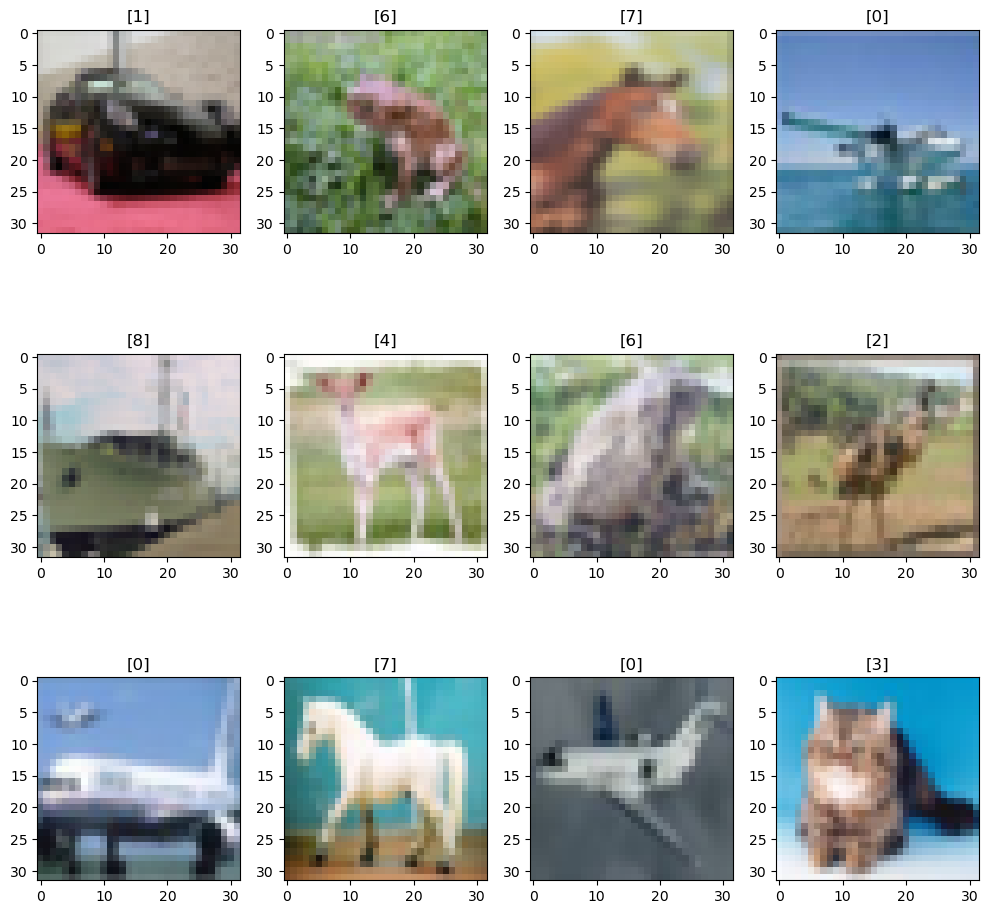

In [17]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_val, y_val) = cifar10.load_data()
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

def show_samples(data, labels):
    plt.subplots(figsize=(10, 10))
    for i in range(12):
        plt.subplot(3, 4, i+1)
        k = np.random.randint(0, data.shape[0])
        plt.title(labels[k])
        plt.imshow(data[k])
    plt.tight_layout()
    plt.show()
  
  
show_samples(X_train, y_train)

In [18]:
# One hot encoding
y_train = tf.one_hot(y_train,
                     depth=y_train.max() + 1,
                     dtype=tf.float64)
y_val = tf.one_hot(y_val,
                   depth=y_val.max() + 1,
                   dtype=tf.float64)
  
y_train = tf.squeeze(y_train)
y_val = tf.squeeze(y_val)

In [19]:
n_classes = 10

""" Build model """
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(32, 32, 3)))
# 1st Conv layer
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same"))
model.add(keras.layers.Activation(keras.activations.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# 2nd Conv layer
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same"))
model.add(keras.layers.Activation(keras.activations.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# 3rd Conv layer
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same"))
model.add(keras.layers.Activation(keras.activations.relu))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# 1st Dense Layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=100))
model.add(keras.layers.Activation(keras.activations.relu))
# 2nd Dense Layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=100))
model.add(keras.layers.Activation(keras.activations.relu))
# Classification layer
model.add(keras.layers.Dense(units=n_classes))
model.add(keras.layers.Activation(keras.activations.softmax))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 activation_18 (Activation)  (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 activation_19 (Activation)  (None, 16, 16, 16)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                 

### b) Train this over a suitable number of epochs until you see stable test performance or before you observe overfitting (by using Adam with default settings). Use this as baseline and remember train and test curves (cost, accuracy) for later reference.

In [20]:
""" Train network """
E = 50
B = 128

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)
log = model.fit(
    x=X_train,
    y=y_train,
    batch_size=B,
    epochs=E,
    validation_data=(X_val, y_val),
)
baseline_log = log

Epoch 1/50
391/391 [==============================] - 2s 4ms/step - loss: 2.2818 - accuracy: 0.2986 - val_loss: 1.6149 - val_accuracy: 0.4160
Epoch 2/50
391/391 [==============================] - 2s 4ms/step - loss: 1.5543 - accuracy: 0.4356 - val_loss: 1.4786 - val_accuracy: 0.4633
Epoch 3/50
391/391 [==============================] - 1s 3ms/step - loss: 1.4338 - accuracy: 0.4831 - val_loss: 1.4214 - val_accuracy: 0.4888
Epoch 4/50
391/391 [==============================] - 1s 3ms/step - loss: 1.3482 - accuracy: 0.5153 - val_loss: 1.3293 - val_accuracy: 0.5256
Epoch 5/50
391/391 [==============================] - 1s 4ms/step - loss: 1.2889 - accuracy: 0.5401 - val_loss: 1.3011 - val_accuracy: 0.5424
Epoch 6/50
391/391 [==============================] - 1s 3ms/step - loss: 1.2208 - accuracy: 0.5667 - val_loss: 1.2740 - val_accuracy: 0.5470
Epoch 7/50
391/391 [==============================] - 1s 3ms/step - loss: 1.1698 - accuracy: 0.5836 - val_loss: 1.2894 - val_accuracy: 0.5546
Epoch 

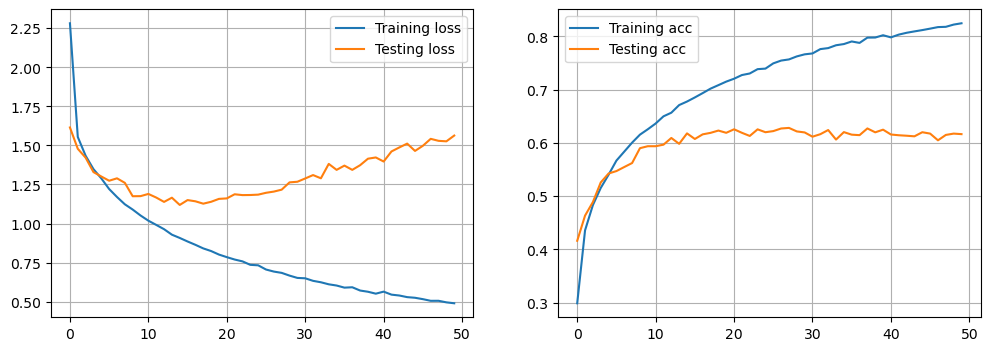

In [21]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### c) Do the same (with the same number of epochs as used above), but now using Tanh instead of ReLU.

In [22]:
""" Build model """
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(32, 32, 3)))
# 1st Conv layer
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same"))
model.add(keras.layers.Activation(keras.activations.tanh))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# 2nd Conv layer
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same"))
model.add(keras.layers.Activation(keras.activations.tanh))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# 3rd Conv layer
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same"))
model.add(keras.layers.Activation(keras.activations.tanh))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# 1st Dense Layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=100))
model.add(keras.layers.Activation(keras.activations.tanh))
# 2nd Dense Layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=100))
model.add(keras.layers.Activation(keras.activations.tanh))
# Classification layer
model.add(keras.layers.Dense(units=n_classes))
model.add(keras.layers.Activation(keras.activations.softmax))
model.summary()

""" Train network """
E = 50
B = 128

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)
log = model.fit(
    x=X_train,
    y=y_train,
    batch_size=B,
    epochs=E,
    validation_data=(X_val, y_val),
)
tanh_log = log

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 activation_24 (Activation)  (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 activation_25 (Activation)  (None, 16, 16, 16)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                 

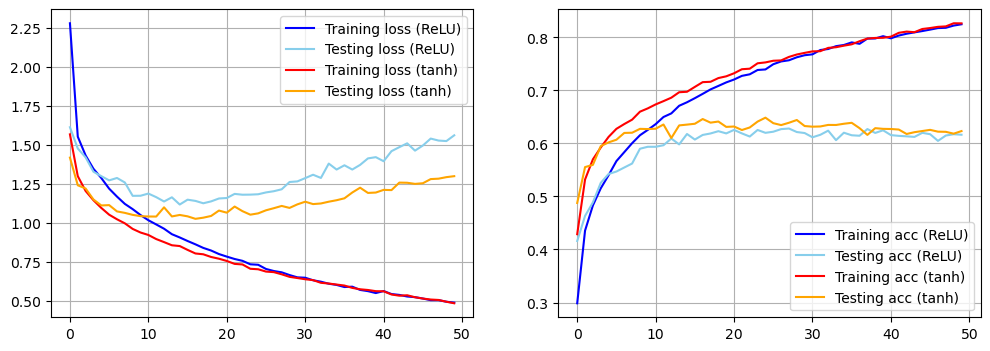

In [31]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(baseline_log.history['loss'], label='Training loss (ReLU)', color="blue")
ax1.plot(baseline_log.history['val_loss'], label='Testing loss (ReLU)', color="skyblue")
ax1.plot(tanh_log.history['loss'], label='Training loss (tanh)', color="red")
ax1.plot(tanh_log.history['val_loss'], label='Testing loss (tanh)', color="orange")
ax1.legend()
ax1.grid()
ax2.plot(baseline_log.history['accuracy'], label='Training acc (ReLU)', color="blue")
ax2.plot(baseline_log.history['val_accuracy'], label='Testing acc (ReLU)', color="skyblue")
ax2.plot(tanh_log.history['accuracy'], label='Training acc (tanh)', color="red")
ax2.plot(tanh_log.history['val_accuracy'], label='Testing acc (tanh)', color="orange")
ax2.legend()
ax2.grid()

### d) Now add batchnorm after each Conv2d and Linear layer (before the non-linearity). Again perform the training (over the same number of epochs). Do this twice : with ReLU and Tanh.

In [34]:
def get_model(activation_function):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(32, 32, 3)))
    # 1st Conv layer
    model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation_function))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    # 2nd Conv layer
    model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation_function))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    # 3rd Conv layer
    model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation_function))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    # 1st Dense Layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation_function))
    # 2nd Dense Layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation_function))
    # Classification layer
    model.add(keras.layers.Dense(units=n_classes))
    model.add(keras.layers.Activation(keras.activations.softmax))
    return model

relu_model = get_model(activation_function=keras.activations.relu)
tanh_model = get_model(activation_function=keras.activations.tanh)

In [35]:
""" Train ReLU model """
relu_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)
relu_log = relu_model.fit(
    x=X_train,
    y=y_train,
    batch_size=B,
    epochs=E,
    validation_data=(X_val, y_val),
)

Epoch 1/50
391/391 [==============================] - 3s 6ms/step - loss: 1.4814 - accuracy: 0.4687 - val_loss: 1.6941 - val_accuracy: 0.4400
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.1367 - accuracy: 0.5934 - val_loss: 1.3128 - val_accuracy: 0.5264
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 0.9989 - accuracy: 0.6440 - val_loss: 1.0754 - val_accuracy: 0.6109
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 0.9127 - accuracy: 0.6764 - val_loss: 1.0552 - val_accuracy: 0.6308
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.8456 - accuracy: 0.7019 - val_loss: 0.9842 - val_accuracy: 0.6553
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.7929 - accuracy: 0.7194 - val_loss: 0.9630 - val_accuracy: 0.6607
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.7507 - accuracy: 0.7345 - val_loss: 1.0421 - val_accuracy: 0.6482
Epoch 

In [36]:
""" Train tanh model """
tanh_model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"]
)
tanh_log = tanh_model.fit(
    x=X_train,
    y=y_train,
    batch_size=B,
    epochs=E,
    validation_data=(X_val, y_val),
)

Epoch 1/50
391/391 [==============================] - 3s 6ms/step - loss: 1.5177 - accuracy: 0.4593 - val_loss: 1.4127 - val_accuracy: 0.4914
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.2286 - accuracy: 0.5638 - val_loss: 1.2024 - val_accuracy: 0.5716
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.1136 - accuracy: 0.6075 - val_loss: 1.2597 - val_accuracy: 0.5643
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.0392 - accuracy: 0.6341 - val_loss: 1.2325 - val_accuracy: 0.5725
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.9815 - accuracy: 0.6536 - val_loss: 1.1032 - val_accuracy: 0.6165
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.9343 - accuracy: 0.6729 - val_loss: 1.1048 - val_accuracy: 0.6105
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.8937 - accuracy: 0.6867 - val_loss: 1.2194 - val_accuracy: 0.5910
Epoch 

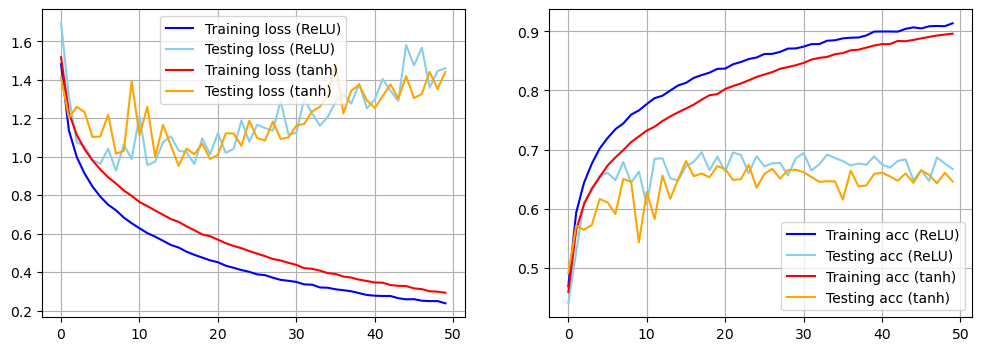

In [37]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(relu_log.history['loss'], label='Training loss (ReLU)', color="blue")
ax1.plot(relu_log.history['val_loss'], label='Testing loss (ReLU)', color="skyblue")
ax1.plot(tanh_log.history['loss'], label='Training loss (tanh)', color="red")
ax1.plot(tanh_log.history['val_loss'], label='Testing loss (tanh)', color="orange")
ax1.legend()
ax1.grid()
ax2.plot(relu_log.history['accuracy'], label='Training acc (ReLU)', color="blue")
ax2.plot(relu_log.history['val_accuracy'], label='Testing acc (ReLU)', color="skyblue")
ax2.plot(tanh_log.history['accuracy'], label='Training acc (tanh)', color="red")
ax2.plot(tanh_log.history['val_accuracy'], label='Testing acc (tanh)', color="orange")
ax2.legend()
ax2.grid()

### e) Now study the impact when adding dropout regularisation before each fully connected layer (not CNN). Do this for the architecture without and with batchnorm. Perform according trainings. How far can you bring up the test accuracy by continuing the training possibly over more epochs ?

In [41]:
def get_model(activation_function, doBatchNorm=False, doDropout=False):
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(32, 32, 3)))
    # 1st Conv layer
    model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same"))
    if doBatchNorm:
        model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation_function))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    # 2nd Conv layer
    model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same"))
    if doBatchNorm:
        model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation_function))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    # 3rd Conv layer
    model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same"))
    if doBatchNorm:
        model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation_function))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    # 1st Dense Layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=100))
    if doDropout:
        model.add(keras.layers.Dropout(rate=0.4))
    if doBatchNorm:
        model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation_function))
    # 2nd Dense Layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=100))
    if doDropout:
        model.add(keras.layers.Dropout(rate=0.4))
    if doBatchNorm:
        model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(activation_function))
    # Classification layer
    model.add(keras.layers.Dense(units=n_classes))
    model.add(keras.layers.Activation(keras.activations.softmax))
    return model

relu_baseline_model = get_model(activation_function=keras.activations.relu)
relu_batchnorm_model = get_model(activation_function=keras.activations.relu, doBatchNorm=True)
relu_batchnorm_dropout_model = get_model(activation_function=keras.activations.relu, doBatchNorm=True, doDropout=True)
tanh_baseline_model = get_model(activation_function=keras.activations.tanh)
tanh_batchnorm_model = get_model(activation_function=keras.activations.tanh, doBatchNorm=True)
tanh_batchnorm_dropout_model = get_model(activation_function=keras.activations.tanh, doBatchNorm=True, doDropout=True)

In [42]:
def train_model(model):
    model.compile(
        loss=keras.losses.categorical_crossentropy,
        optimizer=keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    log = model.fit(
        x=X_train,
        y=y_train,
        batch_size=B,
        epochs=E,
        validation_data=(X_val, y_val),
        verbose=0
    )
    return log

""" Train models """
relu_baseline_model_log = train_model(relu_baseline_model)
relu_batchnorm_model_log = train_model(relu_batchnorm_model)
relu_batchnorm_dropout_model_log = train_model(relu_batchnorm_dropout_model)
tanh_baseline_model_log = train_model(tanh_baseline_model)
tanh_batchnorm_model_log =  train_model(tanh_batchnorm_model)
tanh_batchnorm_dropout_model_log = train_model(tanh_batchnorm_dropout_model)

### f) Create one or several comparisons plots with the learning curves with/without batchnorm also under the different other settings : with/without dropout regularisation and with ReLU or Tanh. Estimate a factor of speedup when using batchnorm (with/without reg, with ReLU or Tanh). Discuss your findings and make a statement about whether the results are as you expect.

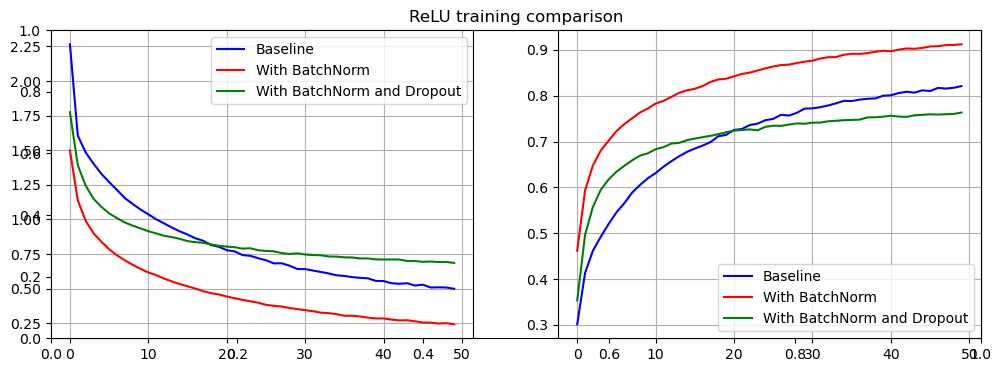

In [50]:
f = plt.figure(figsize=(12,4))
plt.title("ReLU training comparison")
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(relu_baseline_model_log.history['loss'], label='Baseline', color="blue")
ax1.plot(relu_batchnorm_model_log.history['loss'], label='With BatchNorm', color="red")
ax1.plot(relu_batchnorm_dropout_model_log.history['loss'], label='With BatchNorm and Dropout', color="green")
ax1.legend()
ax1.grid()
ax2.plot(relu_baseline_model_log.history['accuracy'], label='Baseline', color="blue")
ax2.plot(relu_batchnorm_model_log.history['accuracy'], label='With BatchNorm', color="red")
ax2.plot(relu_batchnorm_dropout_model_log.history['accuracy'], label='With BatchNorm and Dropout', color="green")
ax2.legend()
ax2.grid()

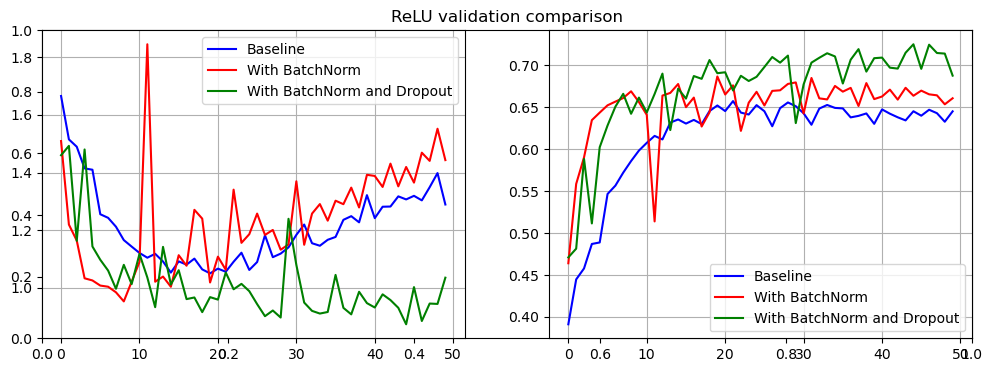

In [51]:
f = plt.figure(figsize=(12,4))
plt.title("ReLU validation comparison")
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(relu_baseline_model_log.history['val_loss'], label='Baseline', color="blue")
ax1.plot(relu_batchnorm_model_log.history['val_loss'], label='With BatchNorm', color="red")
ax1.plot(relu_batchnorm_dropout_model_log.history['val_loss'], label='With BatchNorm and Dropout', color="green")
ax1.legend()
ax1.grid()
ax2.plot(relu_baseline_model_log.history['val_accuracy'], label='Baseline', color="blue")
ax2.plot(relu_batchnorm_model_log.history['val_accuracy'], label='With BatchNorm', color="red")
ax2.plot(relu_batchnorm_dropout_model_log.history['val_accuracy'], label='With BatchNorm and Dropout', color="green")
ax2.legend()
ax2.grid()

> Although the model with BatchNorm only works best while training, it tends to overfit and gets beaten by the model with BatchNorm and Dropout. So this would be the preferred choice.

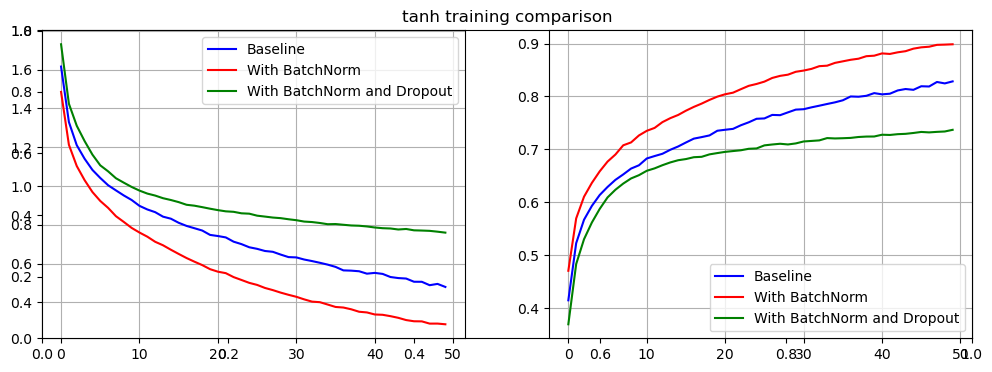

In [52]:
f = plt.figure(figsize=(12,4))
plt.title("tanh training comparison")
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(tanh_baseline_model_log.history['loss'], label='Baseline', color="blue")
ax1.plot(tanh_batchnorm_model_log.history['loss'], label='With BatchNorm', color="red")
ax1.plot(tanh_batchnorm_dropout_model_log.history['loss'], label='With BatchNorm and Dropout', color="green")
ax1.legend()
ax1.grid()
ax2.plot(tanh_baseline_model_log.history['accuracy'], label='Baseline', color="blue")
ax2.plot(tanh_batchnorm_model_log.history['accuracy'], label='With BatchNorm', color="red")
ax2.plot(tanh_batchnorm_dropout_model_log.history['accuracy'], label='With BatchNorm and Dropout', color="green")
ax2.legend()
ax2.grid()

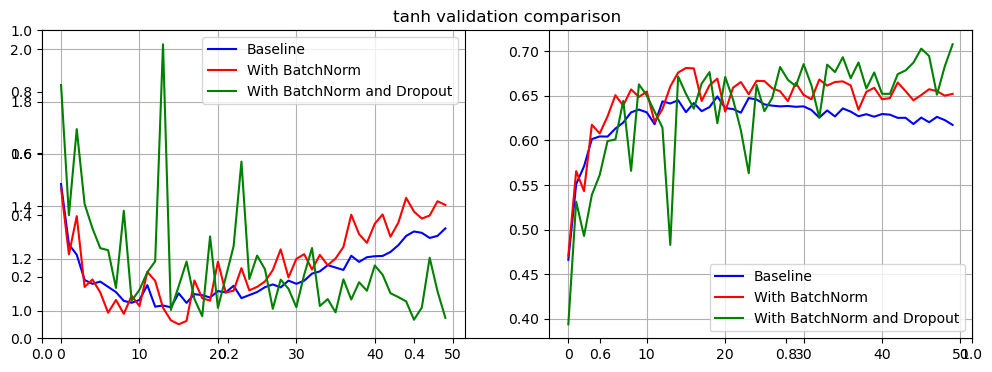

In [53]:
f = plt.figure(figsize=(12,4))
plt.title("tanh validation comparison")
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(tanh_baseline_model_log.history['val_loss'], label='Baseline', color="blue")
ax1.plot(tanh_batchnorm_model_log.history['val_loss'], label='With BatchNorm', color="red")
ax1.plot(tanh_batchnorm_dropout_model_log.history['val_loss'], label='With BatchNorm and Dropout', color="green")
ax1.legend()
ax1.grid()
ax2.plot(tanh_baseline_model_log.history['val_accuracy'], label='Baseline', color="blue")
ax2.plot(tanh_batchnorm_model_log.history['val_accuracy'], label='With BatchNorm', color="red")
ax2.plot(tanh_batchnorm_dropout_model_log.history['val_accuracy'], label='With BatchNorm and Dropout', color="green")
ax2.legend()
ax2.grid()

> Similar as with ReLu the model with BatchNorm only works best while training, it tends to overfit and gets beaten by the model with BatchNorm and Dropout. So this would be the preferred choice as well.

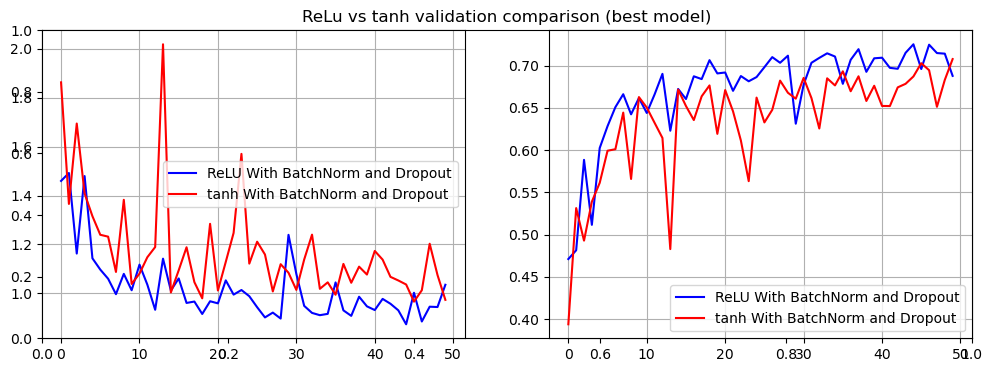

In [54]:
f = plt.figure(figsize=(12,4))
plt.title("ReLu vs tanh validation comparison (best model)")
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(relu_batchnorm_dropout_model_log.history['val_loss'], label='ReLU With BatchNorm and Dropout', color="blue")
ax1.plot(tanh_batchnorm_dropout_model_log.history['val_loss'], label='tanh With BatchNorm and Dropout', color="red")
ax1.legend()
ax1.grid()
ax2.plot(relu_batchnorm_dropout_model_log.history['val_accuracy'], label='ReLU With BatchNorm and Dropout', color="blue")
ax2.plot(tanh_batchnorm_dropout_model_log.history['val_accuracy'], label='tanh With BatchNorm and Dropout', color="red")
ax2.legend()
ax2.grid()

> As expected ReLU has a better overall performance and is also less wiggly. So this would be the preferred activation function.